# Range Search Report

This report is to measure and visualise the time complexity of each approach. For a thorough explanation view the pdf.

In [1]:
# Set up, run it to measure time
import matplotlib.pyplot as plt
import numpy as np
import timeit
from mpl_toolkits.mplot3d import Axes3D
from itertools import repeat

def code_to_test():
    mylist = []
    
    for i in l:
        t.add_new_numbers(mylist, i)
        
    for q in qs:
        t.query(mylist, min(q), max(q))

sizes = [10, 100, 200, 300]
ls = [s for item in sizes for s in repeat(item,4)]
qs = [s for s in sizes] * 4

def run(task):
    for s1 in sizes:
        l = np.random.randint(low=0, high=100000, size=(s1))
        for s2 in sizes:
            qs = np.random.randint(low=0, high=100000, size=(s2,2))
            elapsed_time = %timeit -o code_to_test()
            task.append(elapsed_time.best)

## Task 1.1

Given a list we would like to be able to query an arbitrary range, and append to this list upon request. This approach is trivial, and is only meant to be a benchmark. The time complexity for both functions is $\Theta(n)$. Below is an example on how it performs.

55.1 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
520 µs ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.03 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.45 ms ± 67.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
178 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.45 ms ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.2 ms ± 916 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.06 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
361 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.99 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.94 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.37 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
450 µs ± 125 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.15 ms ± 954 µs per loop (mean ± std. dev. of 7 runs, 100 loops

Text(0.5, 0, 'Time in ms')

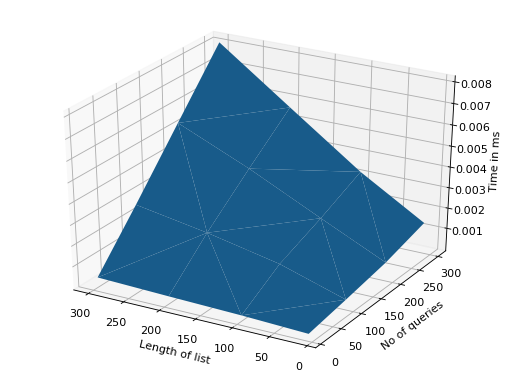

In [2]:
# Task11
from Scripts import Task11 as t

task11_times = []
run(task11_times)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(ls,qs,task11_times)
ax.invert_xaxis()
ax.set_xlabel('Length of list')
ax.set_ylabel('No of queries')
ax.set_zlabel('Time in ms')

The 3D graph might be a bit unnecessary, it however inmediatly shows that the queries are costly, and subsequent queries do not gain anything from previous ones. The linear nature of this approach is also apparent.

## Task12

For the next approach, we build the list by ordering it upon every append. This is of course costly, but will gain better query performance. The query takes advantage of the ordered structure, and uses binary search for the startpoint of the interval. From that on it returns elements until they fall out of the interval, then it breaks.

### Complexity 
Given that we want to initialise a list of $n$ values, we call the function $n$ times. We put the new element at the end of the list, $\Theta(1)$ and then we sort it using a sorting algorithm, $\Theta(n\log_2n)$. So the total complexity is $\Theta(n^2\log_2⁡n)$, the complexity for the query is,as for binary search $\Theta(log_2n) + k$, for the to be returned $k$ elements.

60.5 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
545 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.06 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.69 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
327 µs ± 93.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.1 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.01 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.48 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
877 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.79 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.63 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4 ms ± 974 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.75 ms ± 713 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.78 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.2

Text(0.5, 0, 'Time in ms')

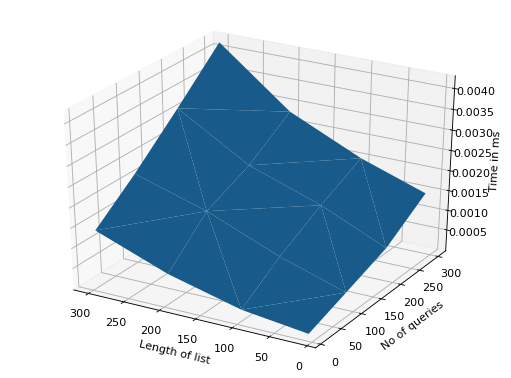

In [3]:
# Task12
from Scripts import Task12 as t
task12_times = []

run(task12_times)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(ls,qs,task12_times)
ax.invert_xaxis()
ax.set_xlabel('Length of list')
ax.set_ylabel('No of queries')
ax.set_zlabel('Time in ms')

## Task21 

The following approach maintains a tree of the data array, and uses that to find query results, for a full explanation, see the assignment. For the complexity calculations, see the report. 

First, let us convince ourselves that the algorithm works. Upon generating some random inputs, we get the following tree (Please note that the graph.clear() method does not work in jupyter, and thus the kernel needs to be reset before subsequent runs):

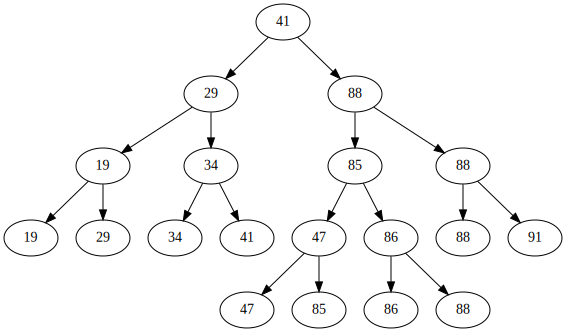

In [1]:
# Test Task21
from graphviz import Digraph
from Scripts import Task21 as t
import numpy as np
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot = Digraph()

def show_tree(node):
    if node.left:
        dot.node(str(node.left),str(node.left.value))
        dot.edge(str(node),str(node.left))
        show_tree(node.left)

    if node.right:
        dot.node(str(node.right),str(node.right.value))
        dot.edge(str(node),str(node.right))
        show_tree(node.right)
        
test_ls = np.random.randint(low=0, high=100, size=(10))
test_qs = np.random.randint(low=0, high=100, size=(2,2))

mylist = []

for i in test_ls:
    t.add_new_numbers(mylist, i)

for element in mylist:
    element = t.Node(element)

t.create_next_level(t.Node.getnodes())
root = t.Node.getroot()
dot.node(str(root),str(root.value))
show_tree(root)
dot

And finally, to see that it returns the correct result:

In [2]:
# Test Task21
for q in test_qs:
    print ("{} - {}:".format(min(q),max(q)), end=" ")
    t.query(root, min(q), max(q), print_res=True)
    print ("")

17 - 34: 29 19 34 
20 - 48: 34 41 29 47 


So now we are in a position to measure the time complexity for this algorithm as well.

In [3]:
# Task21
from Scripts import Task21 as t
import time

task21_times = []

def code_to_test():
    mylist = []
    
    for i in l:
        t.add_new_numbers(mylist, i)
        
    for element in mylist:
        element = t.Node(element)

    t.create_next_level(t.Node.getnodes())
    root = t.Node.getroot()
        
    for q in qs:
        t.query(root, min(q), max(q))

for s1 in sizes:
    l = np.random.randint(low=0, high=100000, size=(s1))
    for s2 in sizes:
        qs = np.random.randint(low=0, high=100000, size=(s2,2))
        now = time.time()
        
        code_to_test()
        
        elapsed_time = time.time() - now
        task21_times.append(elapsed_time)
        print (elapsed_time)

73878 60152 41361 63249 73878 86860 33331 35641 33331 35641 36679 41361 33331 35641 36679 41361 60152 63249 33331 35641 36679 41361 33331 22212 35641 36679 41361 60152 63249 73878 86860 0.04385662078857422


10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 

 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200

 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100

 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10

 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 20

200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 

 300 300 10 10 10 10 100 100 100 100 100 100 100 100 200 200 200 200 300 300 10 10 10 10 200 200 300 300 100 100 200 200 10 10 100 100 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 2

 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100

 100 100 100 100 100 100 200 200 200 200 300 300 10 10 10 10 200 200 300 300 100 100 200 200 10 10 100 100 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 3

 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 20

 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100 200 200 200 200 300 300 300 300 10 10 10 10 100 100 100 100

KeyboardInterrupt: 